
Tugas 2
Tugas LO3: Mahasiswa mampu memilih metode yang cocok untuk menyiapkan data mentah guna analisis yang lebih lanjut berbasiskan kriteria pilihan data.

Carilah sebuah open-dataset.

Kriteria dataset:
- Tema bebas.
- Utamakan dataset yang masih kotor dan perlu preprocessing.
- Pastikan dataset unik untuk setiap mahasiswa.
- Kesamaan dataset dan metode analisis mengindikasikan plagiarisme --> nilai minimal.
- Lakukan preprocessing yang sesuai.
- data cleaning: detecting and removing outliers,
- data integration: detecting redundant attributes (correlation-, covariance analysis)
- data reduction - dimensionality reduction: PCA

Berikan visualisasi yang relevan yang menunjukkan hasil data preprocessing tersebut.

Deliverables:
1) Laporan singkat, yang berisi:
  a) deskripsi dataset
  b) Isi: Visualisasi, Ringkasan data numerik, seperti Insight/Patterns/Relationship/Trend yang ditemukan
  c) Summary
Laporan diketik dan memiliki maksimal 3 halaman dengan ukuran font dan spasi menyesuaikan
2) Sertakan Python script yang anda buat beserta dataset yang digunakan dalam sebuah zip file.
3) Presentasi yang menarik untuk dipresentasikan 19 September 2024

Tugas dikumpulkan melalui eLok DTETI-S1-2024-1-Rekayasa Data
maks 19 September 2024 pukul 09.00

# IMPORT PACKAGES

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, LassoCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.decomposition import PCA

# READING the DATA

In [5]:
# Read the data from the CSV file
# Note: download the data from the link provided in the README.md file and save it in the data folder
data = pd.read_csv('./Occupancy_Estimation.csv')

# Print each columns
print(data.head())

# Print total number of rows and columns
print(data.shape)

# Print categorical variants
print(data.dtypes)

         Date      Time  S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  \
0  2017/12/22  10:49:41    24.94    24.75    24.56    25.38       121   
1  2017/12/22  10:50:12    24.94    24.75    24.56    25.44       121   
2  2017/12/22  10:50:42    25.00    24.75    24.50    25.44       121   
3  2017/12/22  10:51:13    25.00    24.75    24.56    25.44       121   
4  2017/12/22  10:51:44    25.00    24.75    24.56    25.44       121   

   S2_Light  S3_Light  S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  \
0        34        53        40      0.08      0.19      0.06      0.06   
1        33        53        40      0.93      0.05      0.06      0.06   
2        34        53        40      0.43      0.11      0.08      0.06   
3        34        53        40      0.41      0.10      0.10      0.09   
4        34        54        40      0.18      0.06      0.06      0.06   

   S5_CO2  S5_CO2_Slope  S6_PIR  S7_PIR  Room_Occupancy_Count  
0     390      0.769231       0       0       

# DESCRIBE the DATA

In [6]:
# Describe with 2 decimal places
print(data.describe().round(2))

        S1_Temp   S2_Temp   S3_Temp   S4_Temp  S1_Light  S2_Light  S3_Light  \
count  10129.00  10129.00  10129.00  10129.00  10129.00  10129.00  10129.00   
mean      25.45     25.55     25.06     25.75     25.45     26.02     34.25   
std        0.35      0.59      0.43      0.36     51.01     67.30     58.40   
min       24.94     24.75     24.44     24.94      0.00      0.00      0.00   
25%       25.19     25.19     24.69     25.44      0.00      0.00      0.00   
50%       25.38     25.38     24.94     25.75      0.00      0.00      0.00   
75%       25.63     25.63     25.38     26.00     12.00     14.00     50.00   
max       26.38     29.00     26.19     26.56    165.00    258.00    280.00   

       S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound    S5_CO2  \
count  10129.00  10129.00  10129.00  10129.00  10129.00  10129.00   
mean      13.22      0.17      0.12      0.16      0.10    460.86   
std       19.60      0.32      0.27      0.41      0.12    199.96   
min        0

# EXTRACT the DATA by MEANS

In [7]:
# Given that there are 4 temps, 4 lights, 4 sounds, and 2 PIR, to reduce the number of features, we can extract the mean of each of these features
data['Temp'] = data[['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp']].mean(axis=1)
data['Light'] = data[['S1_Light', 'S2_Light', 'S3_Light', 'S4_Light']].mean(axis=1)
data['Sound'] = data[['S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound']].mean(axis=1)
data['PIR'] = data[['S6_PIR', 'S7_PIR']].mean(axis=1)

# drop the original columns
data = data.drop(['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound', 'S6_PIR', 'S7_PIR'], axis=1)

# Print the first 5 rows of the new data
print(data.head())

# Print the total number of rows and columns
print(data.shape)

         Date      Time  S5_CO2  S5_CO2_Slope  Room_Occupancy_Count     Temp  \
0  2017/12/22  10:49:41     390      0.769231                     1  24.9075   
1  2017/12/22  10:50:12     390      0.646154                     1  24.9225   
2  2017/12/22  10:50:42     390      0.519231                     1  24.9225   
3  2017/12/22  10:51:13     390      0.388462                     1  24.9375   
4  2017/12/22  10:51:44     390      0.253846                     1  24.9375   

   Light   Sound  PIR  
0  62.00  0.0975  0.0  
1  61.75  0.2750  0.0  
2  62.00  0.1700  0.0  
3  62.00  0.1750  0.0  
4  62.25  0.0900  0.0  
(10129, 9)


# TIME CONVERSION

In [8]:
# Since date and time are two columns, we can combine them into one column as a datetime object
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])

# Drop the original date and time columns
data = data.drop(['Date', 'Time'], axis=1)

# Print the first 5 rows of the new data
print(data.head())

# Print the total number of rows and columns
print(data.shape)

   S5_CO2  S5_CO2_Slope  Room_Occupancy_Count     Temp  Light   Sound  PIR  \
0     390      0.769231                     1  24.9075  62.00  0.0975  0.0   
1     390      0.646154                     1  24.9225  61.75  0.2750  0.0   
2     390      0.519231                     1  24.9225  62.00  0.1700  0.0   
3     390      0.388462                     1  24.9375  62.00  0.1750  0.0   
4     390      0.253846                     1  24.9375  62.25  0.0900  0.0   

             Datetime  
0 2017-12-22 10:49:41  
1 2017-12-22 10:50:12  
2 2017-12-22 10:50:42  
3 2017-12-22 10:51:13  
4 2017-12-22 10:51:44  
(10129, 8)


# HISTOGRAM PLOT

array([[<Axes: title={'center': 'S5_CO2'}>,
        <Axes: title={'center': 'S5_CO2_Slope'}>,
        <Axes: title={'center': 'Room_Occupancy_Count'}>],
       [<Axes: title={'center': 'Temp'}>,
        <Axes: title={'center': 'Light'}>,
        <Axes: title={'center': 'Sound'}>],
       [<Axes: title={'center': 'PIR'}>,
        <Axes: title={'center': 'Datetime'}>, <Axes: >]], dtype=object)

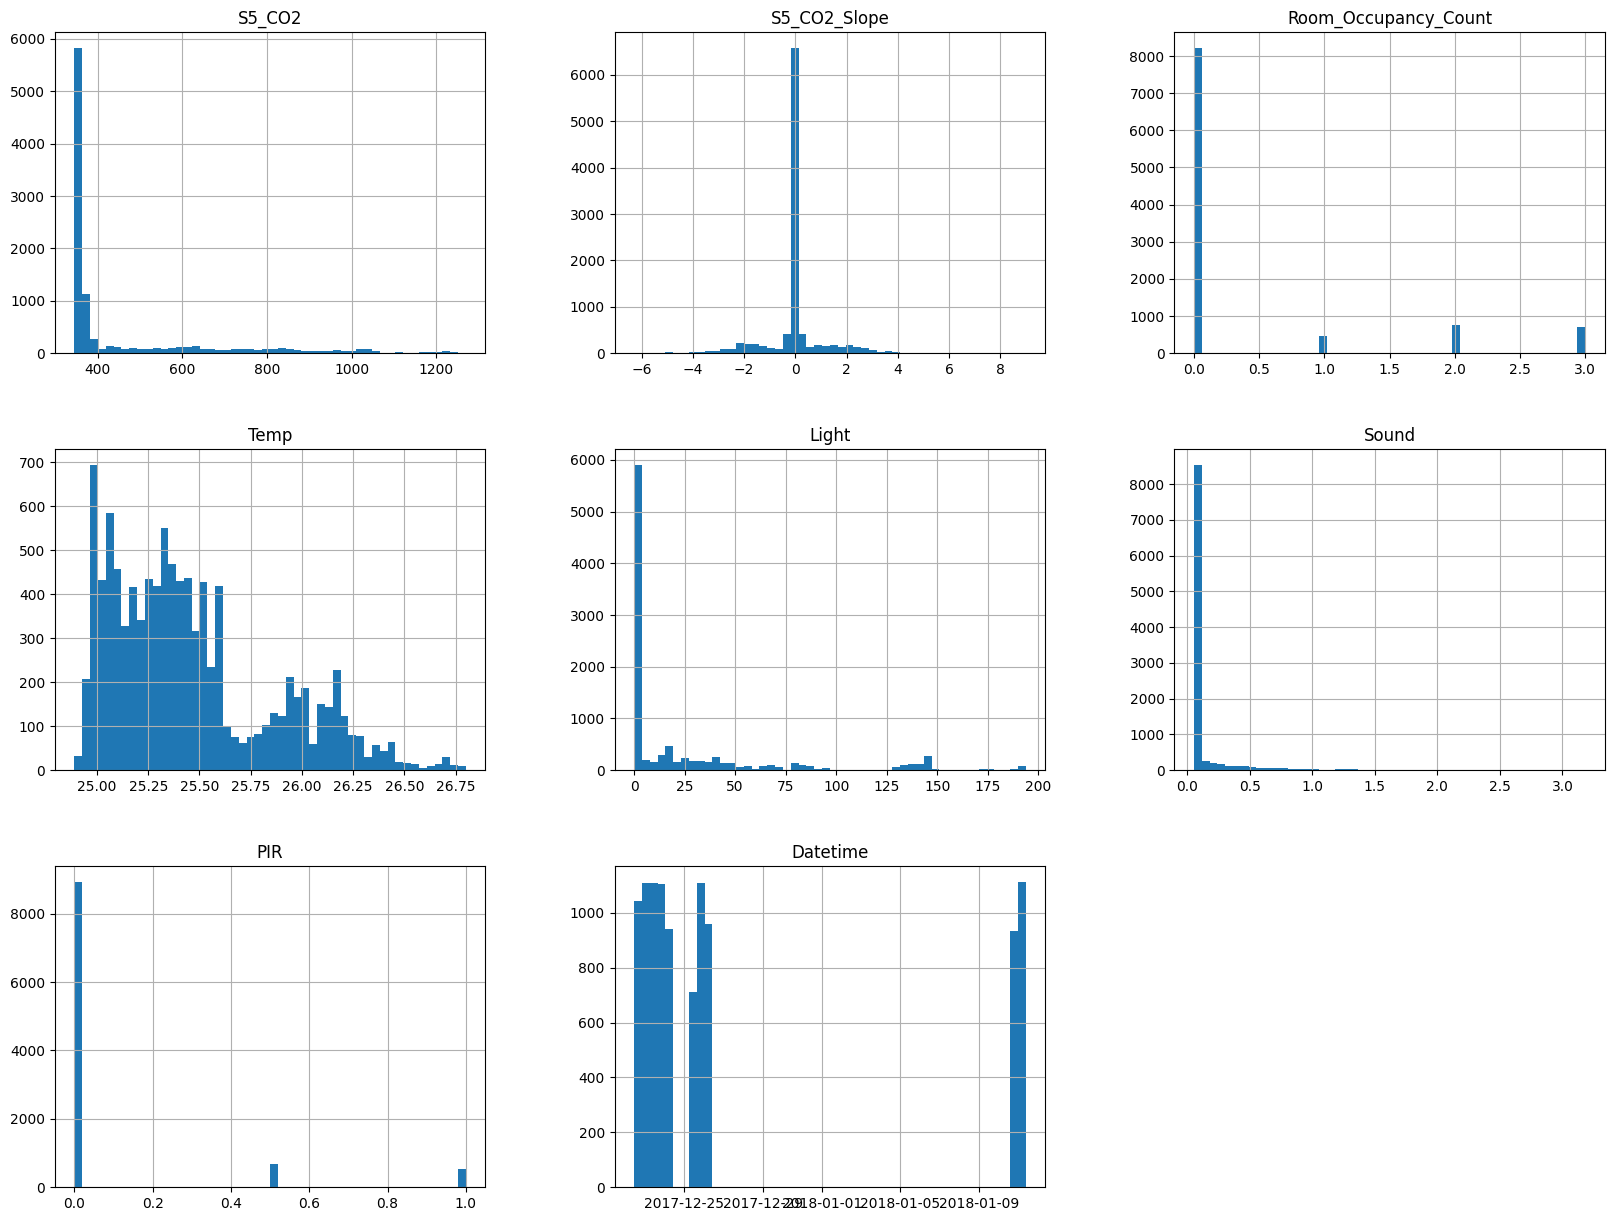

In [9]:
data.hist(bins=50, figsize=(20, 15))

# DUPLICATES TERMINATION (IF EXIST)

In [10]:
# Try to drop duplicates and compare the shape
print(data.shape)
data.drop_duplicates(inplace=True)
print(data.shape)

# After dropping duplicates, we can see that the shape is the same, meaning there are no duplicates

(10129, 8)
(10129, 8)


# EMPTY VALUES HANDLING

In [11]:
# Check for missing values
print(data.isna().sum().sort_values())

# Because there are no missing values, we can proceed to the next step

S5_CO2                  0
S5_CO2_Slope            0
Room_Occupancy_Count    0
Temp                    0
Light                   0
Sound                   0
PIR                     0
Datetime                0
dtype: int64


# ROOM_OCCUPANCY to CATEGORY

In [12]:
# We focus on room occupancy, thus we convert it to categorical to prevent it from being treated as a continuous variable
data['Room_Occupancy_Count'] = data['Room_Occupancy_Count'].astype('category')

# REMAINING COLUMNS

In [13]:
# Remaining Columns
remaining_columns = data.columns

# convert remaining columns to list
remaining_columns = list(remaining_columns)

# get length
len_rem_col = len(remaining_columns)

# Print the remaining columns
print(remaining_columns)

['S5_CO2', 'S5_CO2_Slope', 'Room_Occupancy_Count', 'Temp', 'Light', 'Sound', 'PIR', 'Datetime']


# DESCRIBE the REMAINING DATA

In [14]:
# describe the fixed data
print(data.describe().round(2))

         S5_CO2  S5_CO2_Slope      Temp     Light     Sound       PIR  \
count  10129.00      10129.00  10129.00  10129.00  10129.00  10129.00   
mean     460.86         -0.00     25.45     24.73      0.14      0.08   
min      345.00         -6.30     24.89      0.00      0.05      0.00   
25%      355.00         -0.05     25.13      0.00      0.06      0.00   
50%      360.00          0.00     25.36      0.00      0.07      0.00   
75%      465.00          0.00     25.61     30.50      0.08      0.00   
max     1270.00          8.98     26.80    193.75      3.18      1.00   
std      199.96          1.16      0.40     43.81      0.23      0.25   

                            Datetime  
count                          10129  
mean   2017-12-27 20:27:23.034554112  
min              2017-12-22 10:49:41  
25%              2017-12-23 09:14:33  
50%              2017-12-24 07:06:45  
75%              2017-12-26 04:58:18  
max              2018-01-11 09:00:09  
std                           

# OUTLIERS BOX PLOT

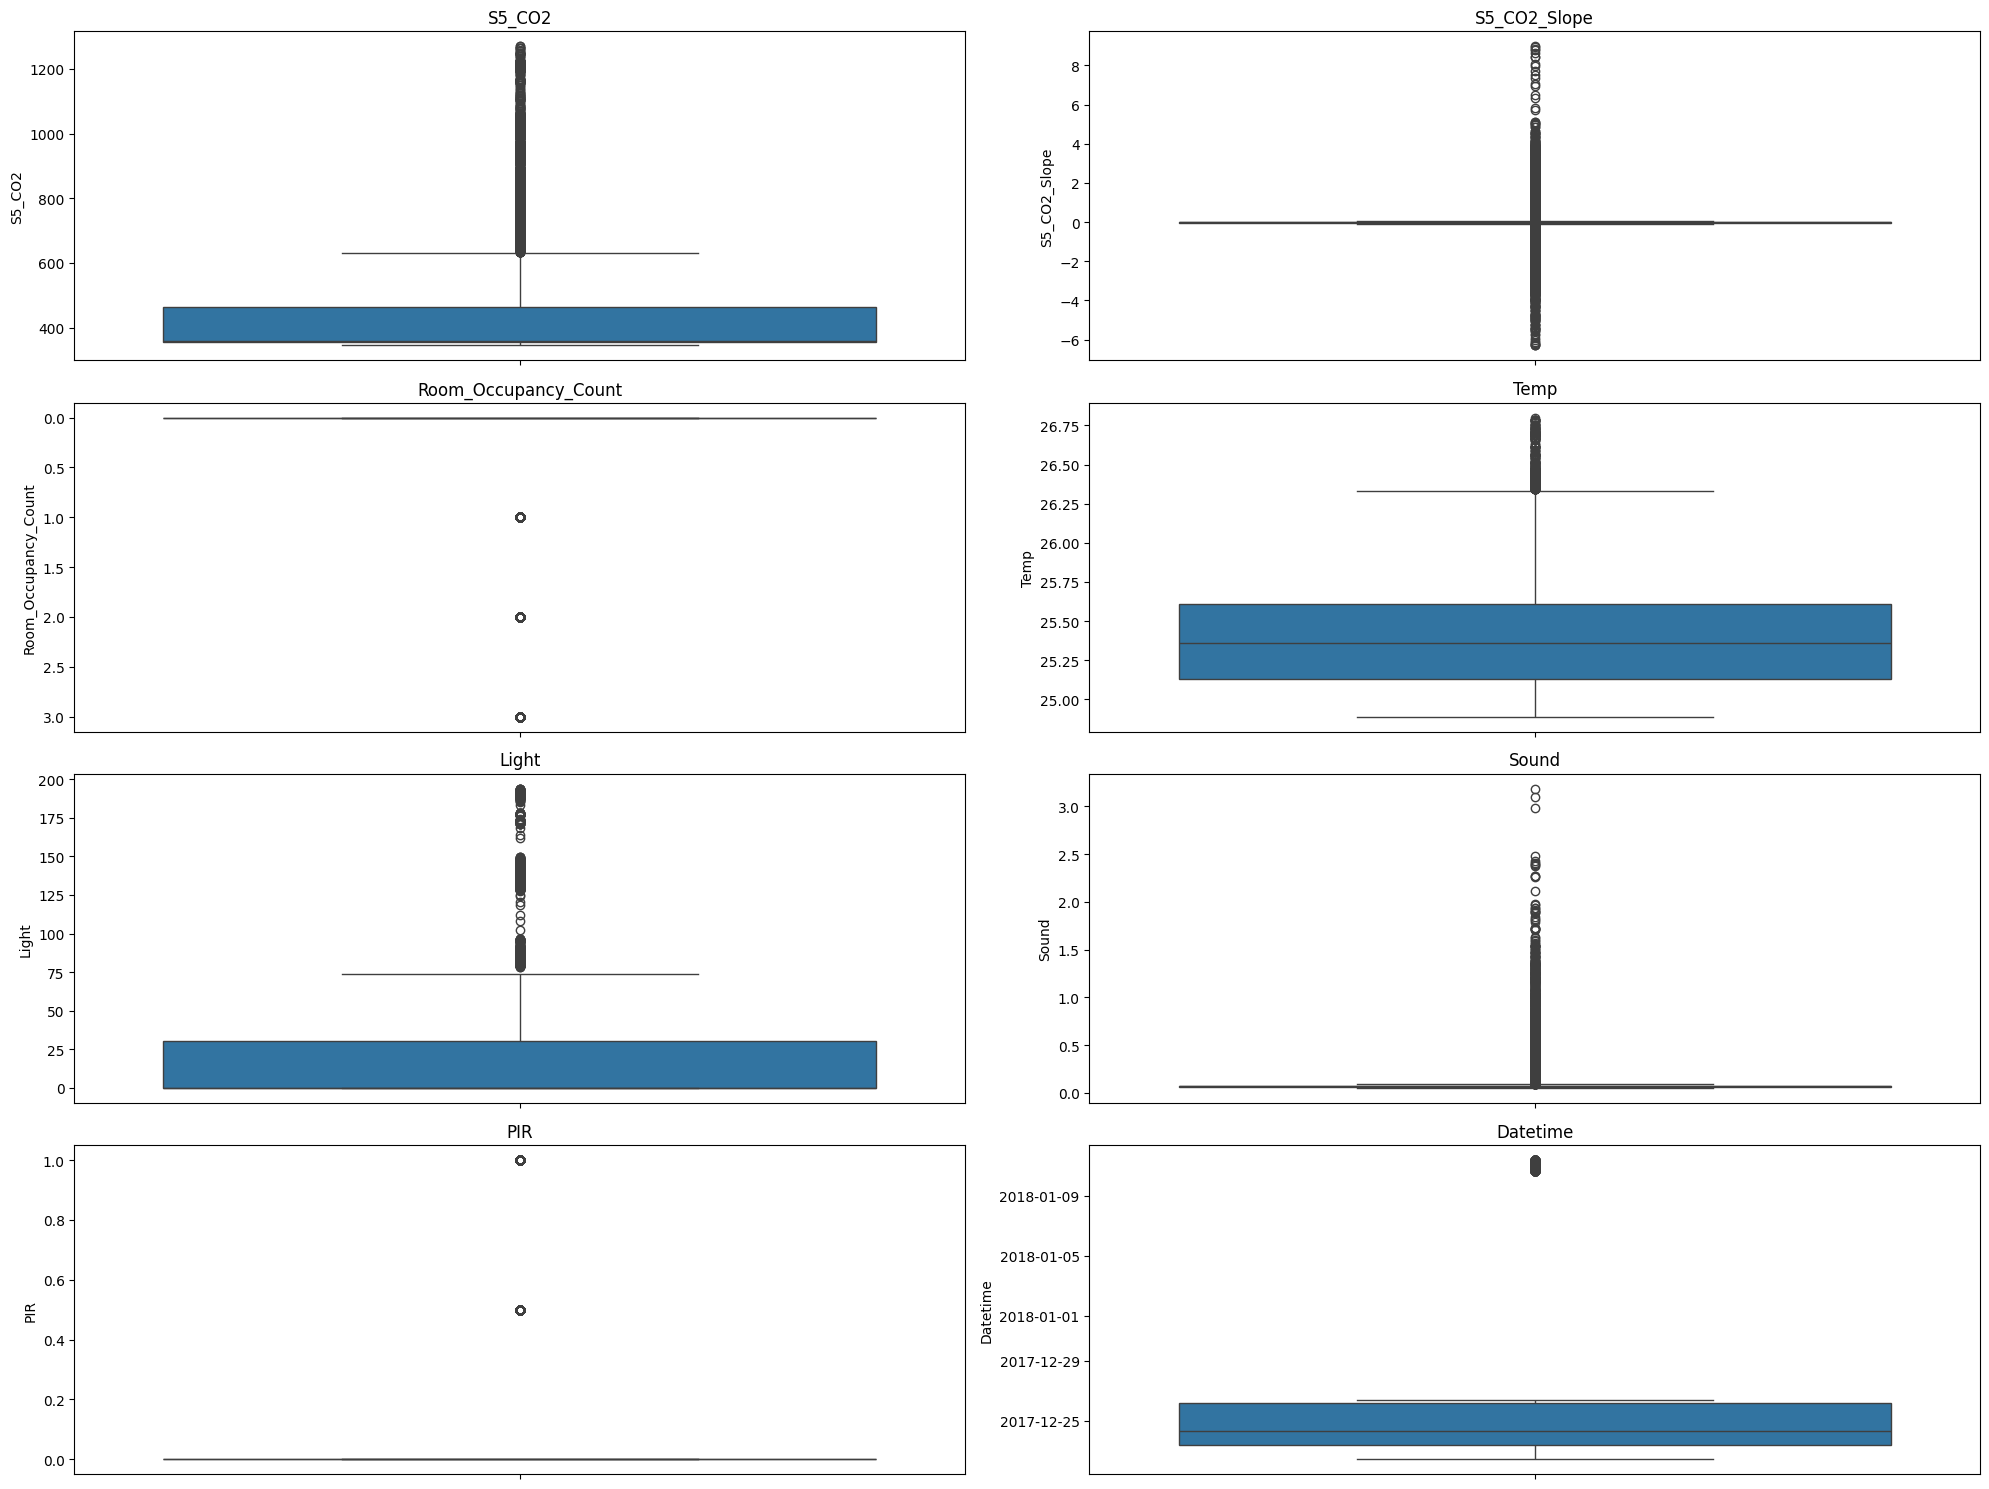

In [15]:
def OutliersBoxplot():
    # Outliers Analysis using boxplot
    fig, ax = plt.subplots(len_rem_col // 2, 2, figsize=(20, 15))
    for i in range(len_rem_col):
        sns.boxplot(data[remaining_columns[i]], ax=ax[i//2, i%2])
        ax[i//2, i%2].set_title(remaining_columns[i])

    # vertically stretch the subplot to make gaps between y-axis larger
    plt.subplots_adjust(hspace=0.01)

    # give space between subplots
    plt.tight_layout()

    plt.show()

OutliersBoxplot()

# MANUAL CLEANING
## NORMALIZING the DATA

In [16]:
# Create an alternate normalized data
data_normalized = data.copy()

# Normalize the data
for i in range(len_rem_col):
    # reject if the data is categorical
    if data_normalized[remaining_columns[i]].dtype.name == 'category':
        continue
    data_normalized[remaining_columns[i]] = (data_normalized[remaining_columns[i]] - data_normalized[remaining_columns[i]].mean()) / data_normalized[remaining_columns[i]].std()

# Print the first 5 rows of the normalized data
print(data_normalized.head())

# Describe the normalized data
print(data_normalized.describe().round(2))

     S5_CO2  S5_CO2_Slope Room_Occupancy_Count      Temp     Light     Sound  \
0 -0.354364      0.664436                    1 -1.365738  0.850633 -0.172809   
1 -0.354364      0.558789                    1 -1.328163  0.844927  0.593059   
2 -0.354364      0.449842                    1 -1.328163  0.850633  0.140010   
3 -0.354364      0.337592                    1 -1.290588  0.850633  0.161584   
4 -0.354364      0.222042                    1 -1.290588  0.856339 -0.205170   

        PIR  Datetime  
0 -0.343706 -0.749145  
1 -0.343706 -0.749095  
2 -0.343706 -0.749047  
3 -0.343706 -0.748998  
4 -0.343706 -0.748948  
         S5_CO2  S5_CO2_Slope      Temp     Light     Sound       PIR  \
count  10129.00      10129.00  10129.00  10129.00  10129.00  10129.00   
mean      -0.00         -0.00      0.00      0.00     -0.00      0.00   
std        1.00          1.00      1.00      1.00      1.00      1.00   
min       -0.58         -5.40     -1.41     -0.56     -0.37     -0.34   
25%       

## CORRELATION PAIRPLOT

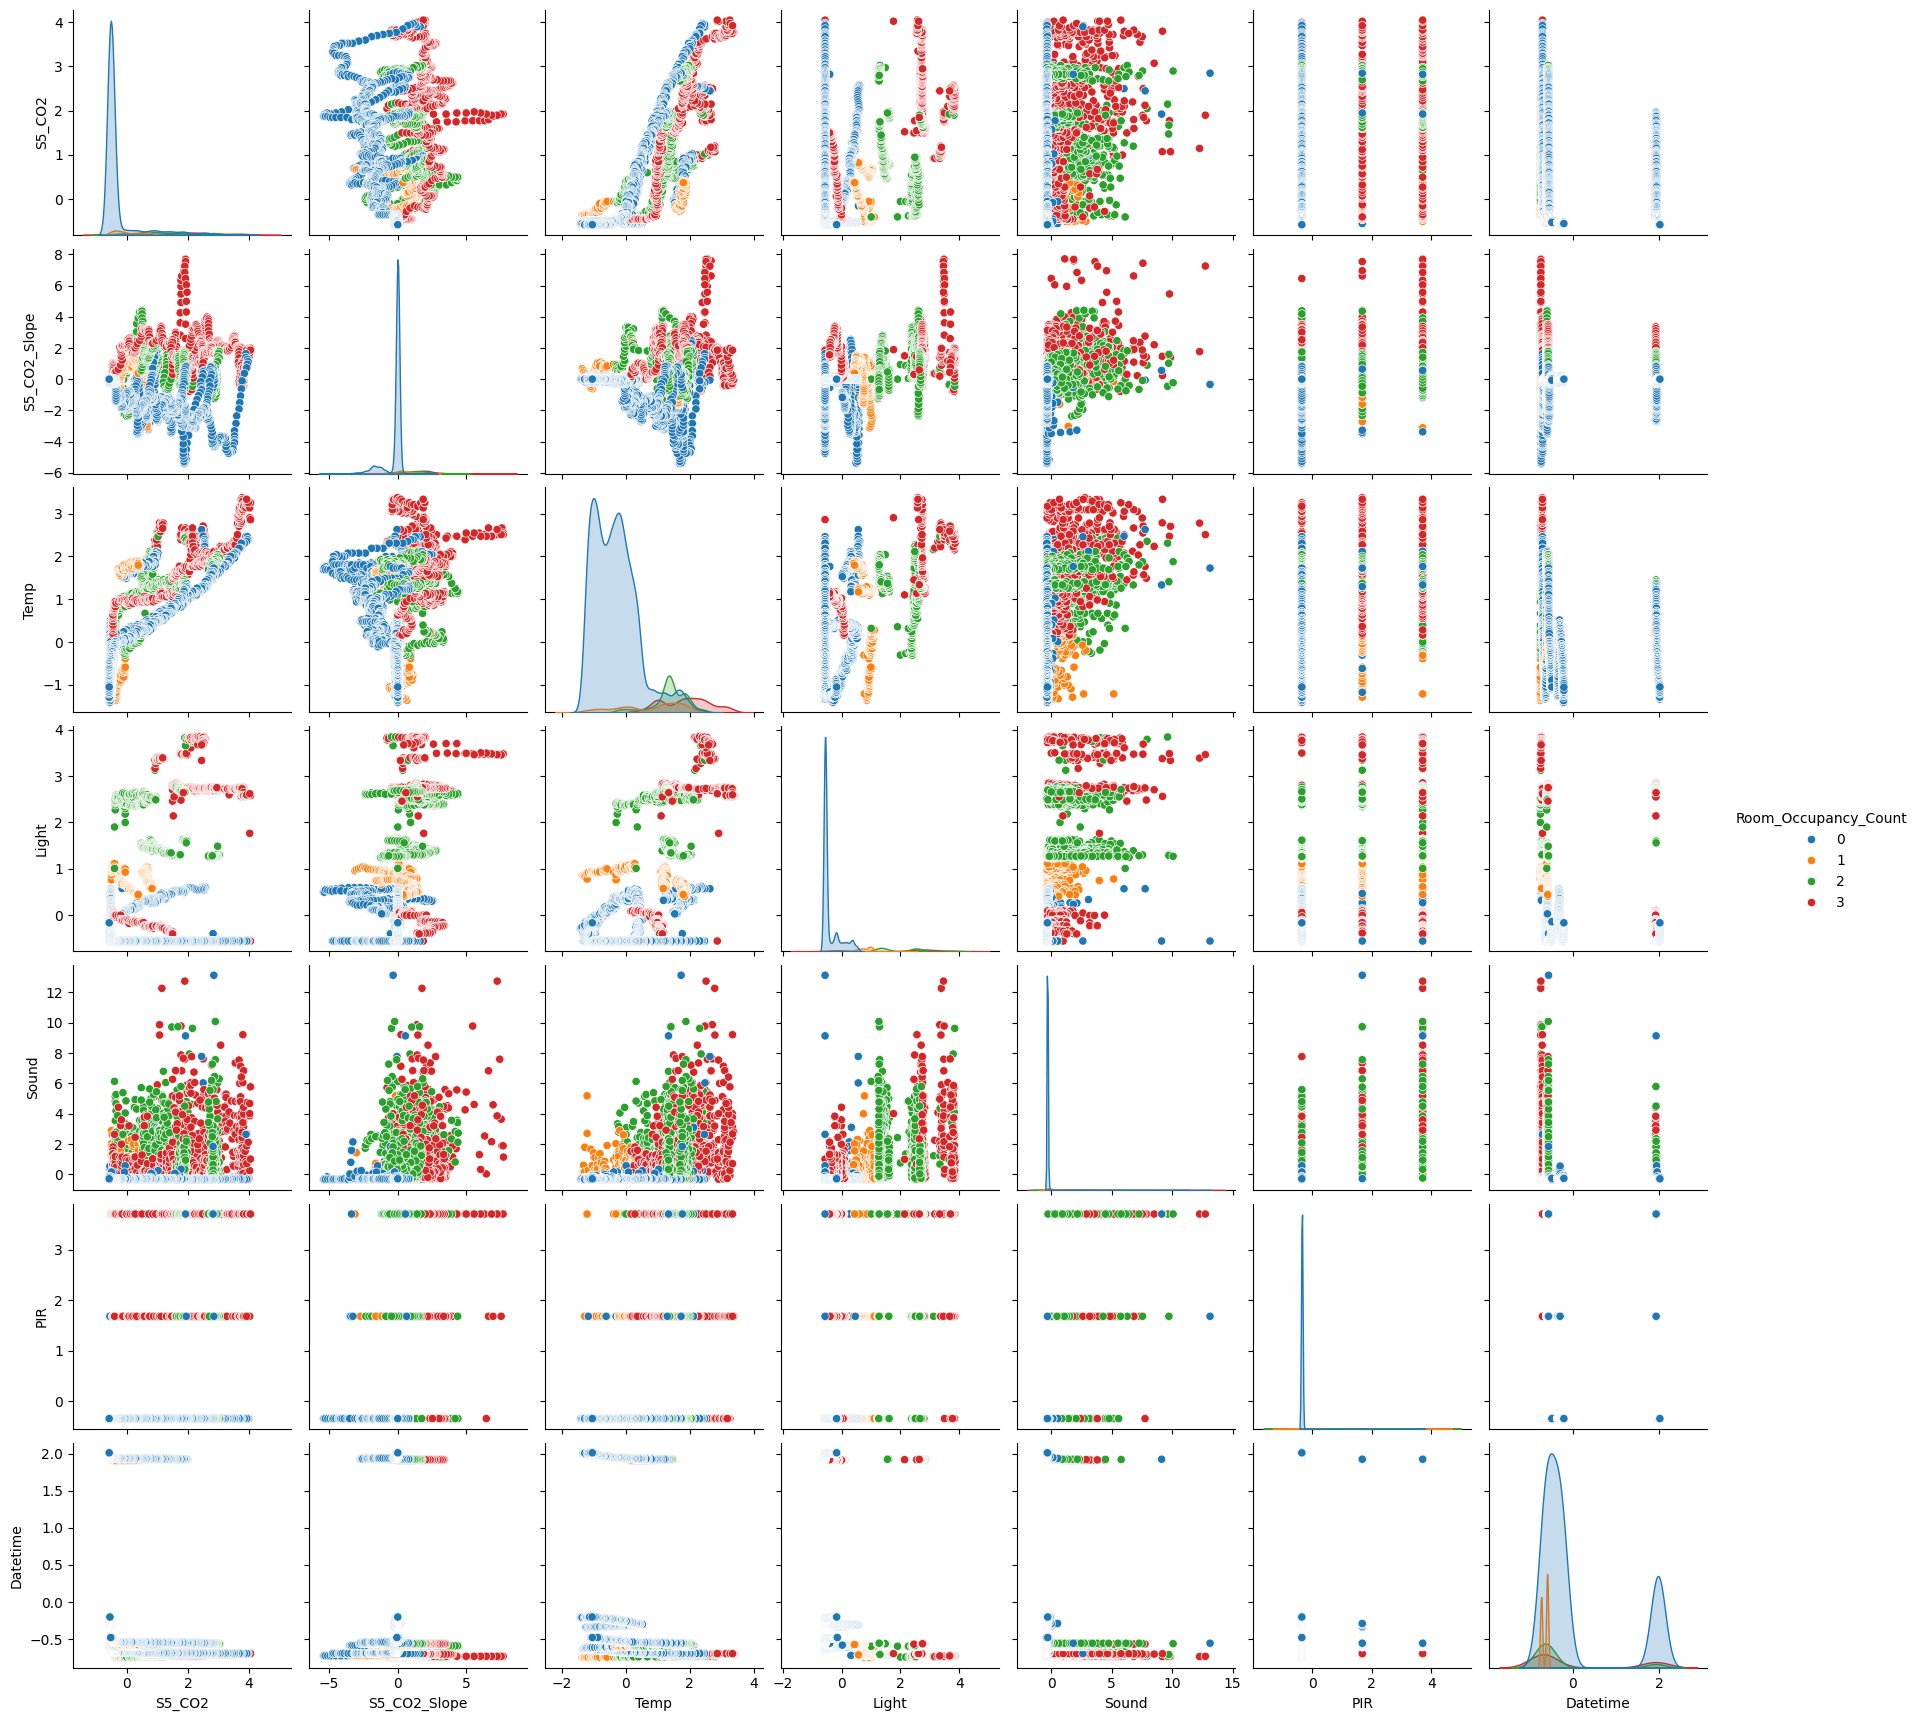

In [17]:
# Pairplot of the normalized data
def Pairplot(data):
    sns.pairplot(data, diag_kind='kde', hue='Room_Occupancy_Count')

Pairplot(data_normalized)

## CORRELATION HEATMAP

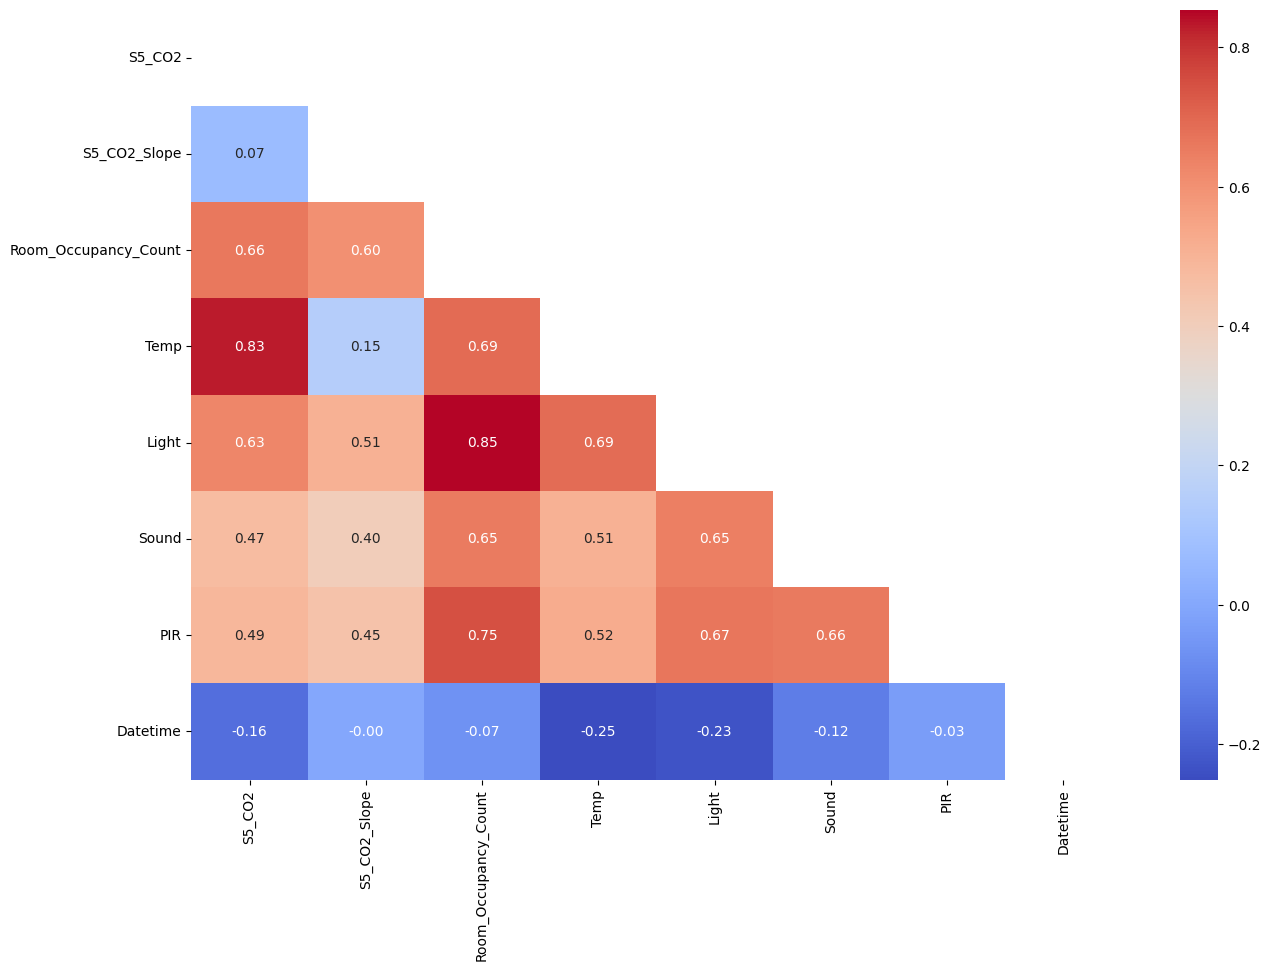

In [18]:
# Check the correlation matrix using heatmap
def CorrelationMatrix(data):
    plt.figure(figsize=(15, 10))
    mask = np.triu(data.corr())
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', mask=mask)

    plt.show()

# Show for the normalized data
CorrelationMatrix(data_normalized)

## OVERCORRELATED REMOVAL

     S5_CO2  S5_CO2_Slope Room_Occupancy_Count     Sound       PIR  Datetime
0 -0.354364      0.664436                    1 -0.172809 -0.343706 -0.749145
1 -0.354364      0.558789                    1  0.593059 -0.343706 -0.749095
2 -0.354364      0.449842                    1  0.140010 -0.343706 -0.749047
3 -0.354364      0.337592                    1  0.161584 -0.343706 -0.748998
4 -0.354364      0.222042                    1 -0.205170 -0.343706 -0.748948
         S5_CO2  S5_CO2_Slope     Sound       PIR  Datetime
count  10129.00      10129.00  10129.00  10129.00  10129.00
mean      -0.00         -0.00     -0.00      0.00      0.00
std        1.00          1.00      1.00      1.00      1.00
min       -0.58         -5.40     -0.37     -0.34     -0.75
25%       -0.53         -0.04     -0.32     -0.34     -0.62
50%       -0.50          0.00     -0.30     -0.34     -0.49
75%        0.02          0.00     -0.27     -0.34     -0.23
max        4.05          7.71     13.14      3.71      2.0

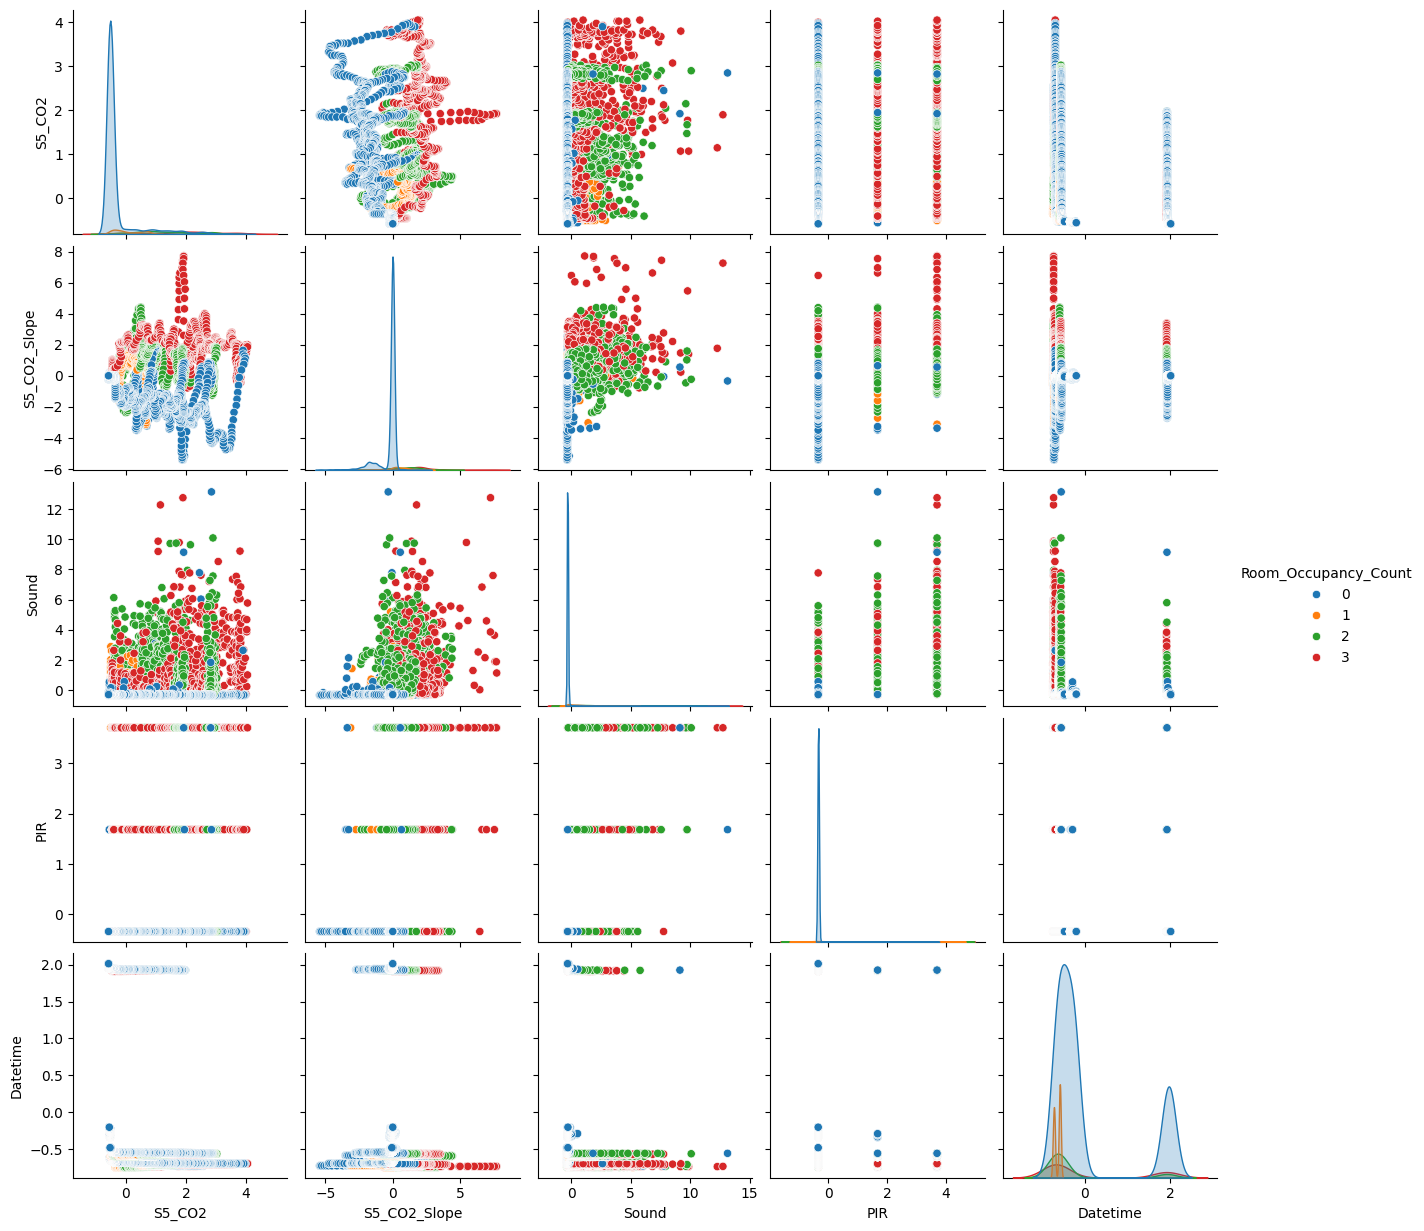

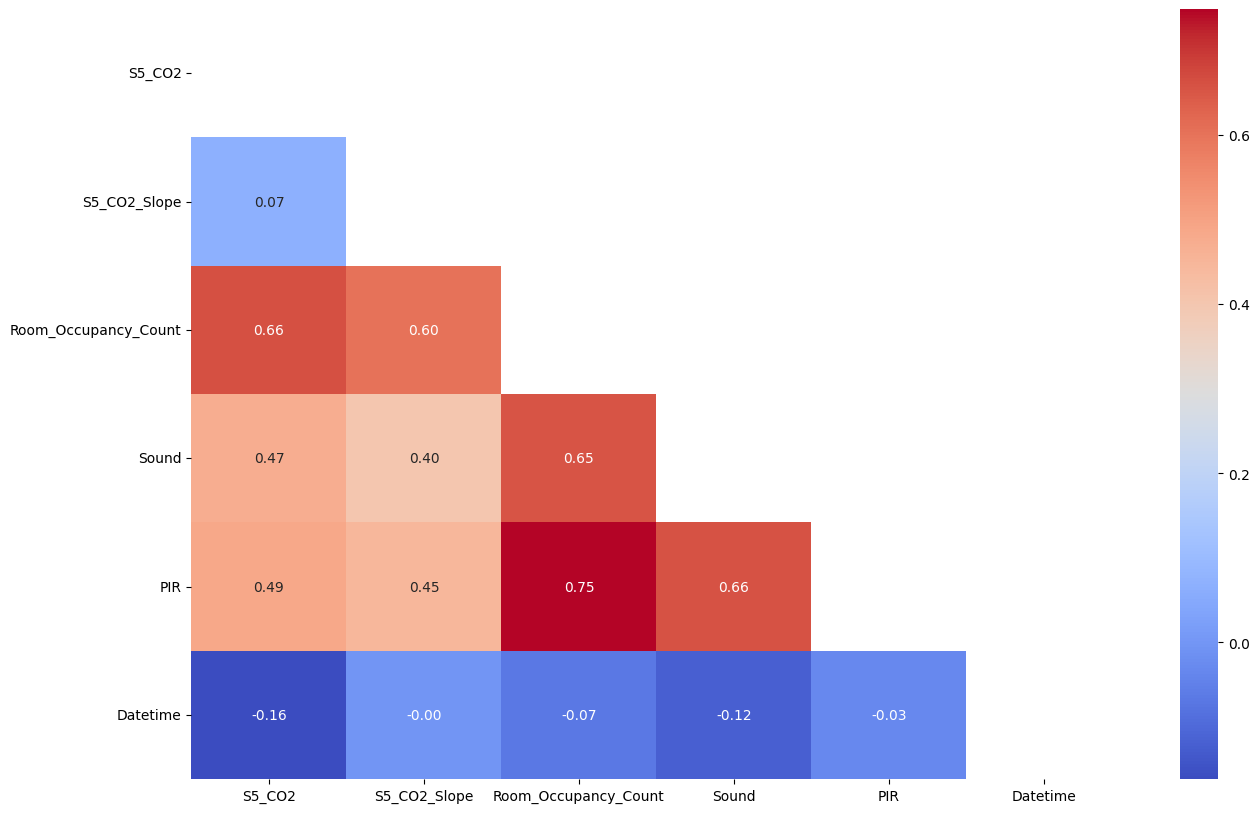

In [19]:
# Create new copy for further correlation removal
data_normalized_corr = data_normalized.copy()

# Remove the correlated columns with a threshold of 0.8
correlation_matrix = data_normalized_corr.corr().abs()
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop the columns
data_normalized_corr = data_normalized_corr.drop(to_drop, axis=1)

# Print the first 5 rows of the new data
print(data_normalized_corr.head())

# Describe the new data
print(data_normalized_corr.describe().round(2))

# Show the pairplot for the new data
Pairplot(data_normalized_corr)

# Show the correlation matrix for the new data
CorrelationMatrix(data_normalized_corr)

## CHECK ACCURACY using MODEL

In [20]:
# Split the data into features and target
X = data_normalized_corr.drop('Room_Occupancy_Count', axis=1)
y = data_normalized_corr['Room_Occupancy_Count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select numerical X
X_train = X_train.select_dtypes(include=['float64', 'int64'])
X_test = X_test.select_dtypes(include=['float64', 'int64'])

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the logistic regression model
lr = LogisticRegression()

# Fit the model
lr.fit(X_train, y_train)

# Predict the target
y_pred = lr.predict(X_test)

# Print the accuracy score
print('Accuracy Score:', accuracy_score(y_test, y_pred))

Accuracy Score: 0.910167818361303


# MODEL FITTING by MANUAL SELECTION
## SPLITTING the DATA

In [21]:
# Copy the data for further analysis
data_model = data.copy()

# Split the data into training and testing sets with a test size of 0.3 using original data
X_train, X_test, y_train, y_test = train_test_split(data_model.drop('Room_Occupancy_Count', axis=1), data_model['Room_Occupancy_Count'], test_size=0.3, random_state=42)

# Select only numerical columns
column_names = data_model.columns
X_train_numeric = X_train.select_dtypes(include=['float64', 'int64'])
X_test_numeric = X_test.select_dtypes(include=['float64', 'int64'])

# Scale the data
scaler = StandardScaler()
X_train_numeric = scaler.fit_transform(X_train_numeric)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_numeric, y_train)

X_test_std = scaler.transform(X_test_numeric)
y_pred = lr.predict(X_test_std)

# Print the accuracy score
print('Accuracy: ', accuracy_score(y_test, y_pred))

# Printing Feature Coefficients
print('Feature Coefficients: ', lr.coef_)
print(dict(zip(column_names, lr.coef_[0])))

Accuracy:  0.9496544916090819
Feature Coefficients:  [[ 0.27914724 -2.19671261 -1.3395562  -6.13132864 -0.45649245 -1.59253673]
 [-1.21891723 -0.40013646  0.1931307   1.37469131 -0.18827531  0.06142505]
 [ 0.29884754  0.73553323 -0.17117471  2.5853768   0.40274431  0.57066877]
 [ 0.64092245  1.86131584  1.31760021  2.17126052  0.24202346  0.9604429 ]]
{'S5_CO2': np.float64(0.2791472427261229), 'S5_CO2_Slope': np.float64(-2.196712610775404), 'Room_Occupancy_Count': np.float64(-1.3395562016836888), 'Temp': np.float64(-6.131328643890141), 'Light': np.float64(-0.45649245157483087), 'Sound': np.float64(-1.59253672579938)}


## DROPPING LITTLE CONTRIBUTIONS

In [22]:
# Because S5_CO2 contributes only .28 to the model, we can remove it and see if the model improves
data_model.drop('S5_CO2', axis=1, inplace=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(data_model.drop('Room_Occupancy_Count', axis=1), data_model['Room_Occupancy_Count'], test_size=0.3, random_state=42)

# Select only numerical columns
column_names = data_model.columns
X_train_numeric = X_train.select_dtypes(include=['float64', 'int64'])
X_test_numeric = X_test.select_dtypes(include=['float64', 'int64'])

# Scale the data
scaler = StandardScaler()
X_train_numeric = scaler.fit_transform(X_train_numeric)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_numeric, y_train)

X_test_std = scaler.transform(X_test_numeric)
y_pred = lr.predict(X_test_std)

# Print the accuracy score
print('Accuracy: ', accuracy_score(y_test, y_pred))

# Printing Feature Coefficients
print('Feature Coefficients: ', lr.coef_)
print(dict(zip(column_names, lr.coef_[0])))

Accuracy:  0.945705824284304
Feature Coefficients:  [[-1.96025925 -1.2677566  -5.75340154 -0.48937756 -1.53269563]
 [-0.30131753 -0.68954797  1.00243655 -0.12124495  0.09019554]
 [ 0.57841336  0.08396321  2.5628348   0.38395245  0.5254694 ]
 [ 1.68316342  1.87334136  2.18813019  0.22667006  0.91703069]]
{'S5_CO2_Slope': np.float64(-1.960259246308179), 'Room_Occupancy_Count': np.float64(-1.2677565990003343), 'Temp': np.float64(-5.753401535787548), 'Light': np.float64(-0.4893775626631661), 'Sound': np.float64(-1.5326956286288764)}


## PLOT the RESULT

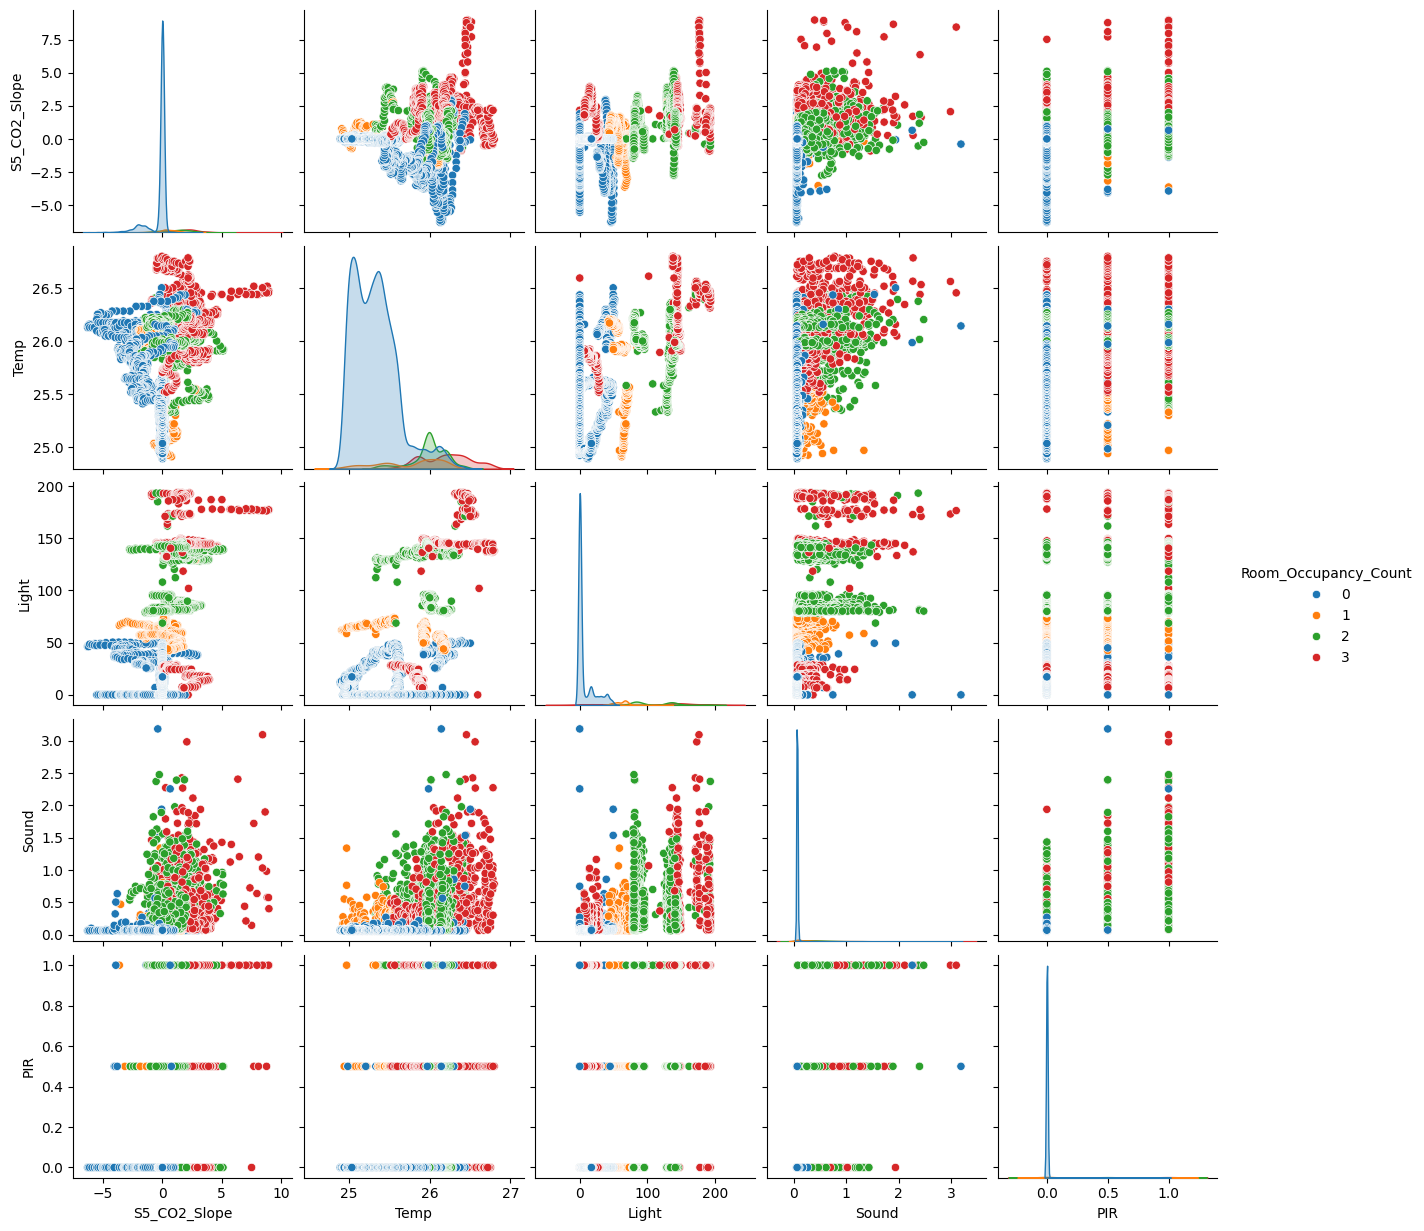

In [23]:
# Pairplot the data_model
Pairplot(data_model)

# RECURSIVE FEATURE ELIMINATION
## RFE ANALYSIS

In [24]:
def RFEByFeatures(n_features_to_select, estimator=LogisticRegression(max_iter=1000)):
  # Copy the data for further analysis
  data_rfe = data.copy()

  # RFE definition
  rfe = RFE(estimator=estimator, n_features_to_select=n_features_to_select, verbose=1)
  X_rfe = data_rfe.drop('Room_Occupancy_Count', axis=1)
  y_rfe = data_rfe['Room_Occupancy_Count']

  # Select only numerical columns
  X_rfe = X_rfe.select_dtypes(include=['float64', 'int64'])
  column_names = X_rfe.columns

  # Scale the data
  scaler = StandardScaler()
  X_rfe = scaler.fit_transform(X_rfe)

  # Fit the model
  rfe.fit(X_rfe, y_rfe)

  # Inspect RFE results
  print('Selected Features: ', column_names[rfe.support_])
  print(dict(zip(column_names, rfe.ranking_)))
  print('Accuracy: ', rfe.score(X_rfe, y_rfe))

# Features selection array:
features = [6, 5, 4, 3, 2, 1]

for feature in features:
  RFEByFeatures(feature)

Selected Features:  Index(['S5_CO2', 'S5_CO2_Slope', 'Temp', 'Light', 'Sound', 'PIR'], dtype='object')
{'S5_CO2': np.int64(1), 'S5_CO2_Slope': np.int64(1), 'Temp': np.int64(1), 'Light': np.int64(1), 'Sound': np.int64(1), 'PIR': np.int64(1)}
Accuracy:  0.9572514562148287
Fitting estimator with 6 features.
Selected Features:  Index(['S5_CO2', 'S5_CO2_Slope', 'Temp', 'Light', 'PIR'], dtype='object')
{'S5_CO2': np.int64(1), 'S5_CO2_Slope': np.int64(1), 'Temp': np.int64(1), 'Light': np.int64(1), 'Sound': np.int64(2), 'PIR': np.int64(1)}
Accuracy:  0.9551782012044624
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Selected Features:  Index(['S5_CO2_Slope', 'Temp', 'Light', 'PIR'], dtype='object')
{'S5_CO2': np.int64(2), 'S5_CO2_Slope': np.int64(1), 'Temp': np.int64(1), 'Light': np.int64(1), 'Sound': np.int64(3), 'PIR': np.int64(1)}
Accuracy:  0.9463915490176721
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Selec

# RANDOM FOREST CLASSIFIER
## RF ANALYSIS

In [25]:
# Copy the data for further analysis
data_rf = data.copy()

# Random Forest Classifier definition
rf = RandomForestClassifier()
X_rf = data_rf.drop('Room_Occupancy_Count', axis=1)
y_rf = data_rf['Room_Occupancy_Count']

# Select only numerical columns
X_rf = X_rf.select_dtypes(include=['float64', 'int64'])
column_names = X_rf.columns

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.3, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Predict the target
y_pred = rf.predict(X_test)

# Print the accuracy score
print('Accuracy: ', accuracy_score(y_test, y_pred))

# Features
print('Features: ', X_rf.columns)

Accuracy:  0.9967094438960185
Features:  Index(['S5_CO2', 'S5_CO2_Slope', 'Temp', 'Light', 'Sound', 'PIR'], dtype='object')


## FEATURE IMPORTANCES ANALYSIS

In [26]:
# Printing Feature Importances
print('Feature Importances: ', rf.feature_importances_)

# Mask for feature importances greater than 0.1
mask = rf.feature_importances_ > 0.1

# Apply the mask
X_reduced = X_rf.iloc[:, mask]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_rf, test_size=0.3, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Predict the target
y_pred = rf.predict(X_test)

# Print the accuracy score
print('Accuracy: ', accuracy_score(y_test, y_pred))

# Features
print('Features: ', X_reduced.columns)

Feature Importances:  [0.07352857 0.15565112 0.09360878 0.40730422 0.18594883 0.08395847]
Accuracy:  0.98749588680487
Features:  Index(['S5_CO2_Slope', 'Light', 'Sound'], dtype='object')


## RFE using RF

In [27]:
# Call RFEByFeatures with RF estimator
features = [6, 5, 4, 3, 2, 1]
for feature in features:
  RFEByFeatures(feature, estimator=RandomForestClassifier())

Selected Features:  Index(['S5_CO2', 'S5_CO2_Slope', 'Temp', 'Light', 'Sound', 'PIR'], dtype='object')
{'S5_CO2': np.int64(1), 'S5_CO2_Slope': np.int64(1), 'Temp': np.int64(1), 'Light': np.int64(1), 'Sound': np.int64(1), 'PIR': np.int64(1)}
Accuracy:  1.0
Fitting estimator with 6 features.
Selected Features:  Index(['S5_CO2_Slope', 'Temp', 'Light', 'Sound', 'PIR'], dtype='object')
{'S5_CO2': np.int64(2), 'S5_CO2_Slope': np.int64(1), 'Temp': np.int64(1), 'Light': np.int64(1), 'Sound': np.int64(1), 'PIR': np.int64(1)}
Accuracy:  1.0
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Selected Features:  Index(['S5_CO2_Slope', 'Temp', 'Light', 'Sound'], dtype='object')
{'S5_CO2': np.int64(2), 'S5_CO2_Slope': np.int64(1), 'Temp': np.int64(1), 'Light': np.int64(1), 'Sound': np.int64(1), 'PIR': np.int64(3)}
Accuracy:  1.0
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Selected Features:  Index(['S5_CO2_Slope', 'Light

## RFE using GradientBoostingRegressor

In [28]:
# Call RFEByFeatures with GradientBoostingRegressor estimator
features = [6, 5, 4, 3, 2, 1]
for feature in features:
  RFEByFeatures(feature, estimator=GradientBoostingRegressor()) 

Selected Features:  Index(['S5_CO2', 'S5_CO2_Slope', 'Temp', 'Light', 'Sound', 'PIR'], dtype='object')
{'S5_CO2': np.int64(1), 'S5_CO2_Slope': np.int64(1), 'Temp': np.int64(1), 'Light': np.int64(1), 'Sound': np.int64(1), 'PIR': np.int64(1)}
Accuracy:  0.9918772668066244
Fitting estimator with 6 features.
Selected Features:  Index(['S5_CO2', 'S5_CO2_Slope', 'Temp', 'Light', 'Sound'], dtype='object')
{'S5_CO2': np.int64(1), 'S5_CO2_Slope': np.int64(1), 'Temp': np.int64(1), 'Light': np.int64(1), 'Sound': np.int64(1), 'PIR': np.int64(2)}
Accuracy:  0.9920238327631178
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Selected Features:  Index(['S5_CO2_Slope', 'Temp', 'Light', 'Sound'], dtype='object')
{'S5_CO2': np.int64(2), 'S5_CO2_Slope': np.int64(1), 'Temp': np.int64(1), 'Light': np.int64(1), 'Sound': np.int64(1), 'PIR': np.int64(3)}
Accuracy:  0.9888727473041148
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
S

# LINEAR REGRESSION ANALYSIS
## ORDINARY LINREG

In [29]:
# Data copy for further analysis
data_linreg = data.copy()

# Linear Regression definition
lr = LinearRegression()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(data_linreg.drop('Room_Occupancy_Count', axis=1), data_linreg['Room_Occupancy_Count'], test_size=0.3, random_state=42)

# Select only numerical columns
X_train = X_train.select_dtypes(include=['float64', 'int64'])
X_test = X_test.select_dtypes(include=['float64', 'int64'])

# Fit the model
lr.fit(X_train, y_train)

# Predict the target
y_pred = lr.predict(X_test)

# Print the accuracy score
print('Accuracy: ', lr.score(X_test, y_test))

# Printing Feature Coefficients
print('Feature Coefficients: ', lr.coef_)
print(dict(zip(column_names, lr.coef_)))

# Print the intercept
print('Intercept: ', lr.intercept_)

# Print the R-squared value
print('R-squared: ', lr.score(X_test, y_test))

Accuracy:  0.8514737994865069
Feature Coefficients:  [0.00103467 0.23468516 0.27585775 0.00646097 0.0122942  0.82380516]
{'S5_CO2': np.float64(0.001034668475267847), 'S5_CO2_Slope': np.float64(0.23468515977860724), 'Temp': np.float64(0.27585775190395717), 'Light': np.float64(0.006460974015059934), 'Sound': np.float64(0.012294198474976474), 'PIR': np.float64(0.8238051580505138)}
Intercept:  -7.327883046512124
R-squared:  0.8514737994865069


## LASSO REGRESSOR

In [30]:
# Data copy for further analysis
data_lasso = data.copy()

# Lasso definition
alpha_values = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]

for alpha in alpha_values:
  # Define the Lasso model
  alpha_lasso = Lasso(alpha=alpha)
  
  # Split the data
  X_train, X_test, y_train, y_test = train_test_split(data_lasso.drop('Room_Occupancy_Count', axis=1), data_lasso['Room_Occupancy_Count'], test_size=0.3, random_state=42)
  
  # Select only numerical columns
  X_train = X_train.select_dtypes(include=['float64', 'int64'])
  X_test = X_test.select_dtypes(include=['float64', 'int64'])
  
  # Fit the model
  alpha_lasso.fit(X_train, y_train)
  
  # Predict the target
  y_pred = alpha_lasso.predict(X_test)
  
  # Print the accuracy score
  print('Alpha: ', alpha)
  print('Accuracy: ', alpha_lasso.score(X_test, y_test))
  
  # Printing Feature Coefficients
  print('Feature Coefficients: ', alpha_lasso.coef_)
  print(dict(zip(column_names, alpha_lasso.coef_)))
  
  # Print the intercept
  print('Intercept: ', alpha_lasso.intercept_)
  
  # Print the R-squared value
  print('R-squared: ', alpha_lasso.score(X_test, y_test))
  
  # Print space
  print('\n')

Alpha:  0.001
Accuracy:  0.8518290752391592
Feature Coefficients:  [0.00106742 0.23462954 0.25441099 0.00663289 0.         0.79994131]
{'S5_CO2': np.float64(0.0010674197479955056), 'S5_CO2_Slope': np.float64(0.23462953523076135), 'Temp': np.float64(0.25441098808203233), 'Light': np.float64(0.00663289307433256), 'Sound': np.float64(0.0), 'PIR': np.float64(0.7999413113757886)}
Intercept:  -6.797674894748624
R-squared:  0.8518290752391592


Alpha:  0.005
Accuracy:  0.8524809560509632
Feature Coefficients:  [0.0011943  0.23370635 0.16745371 0.00724763 0.         0.68653858]
{'S5_CO2': np.float64(0.0011943030728136176), 'S5_CO2_Slope': np.float64(0.23370635424045252), 'Temp': np.float64(0.16745370637358342), 'Light': np.float64(0.007247634465084403), 'Sound': np.float64(0.0), 'PIR': np.float64(0.6865385814635757)}
Intercept:  -4.648568967429766
R-squared:  0.8524809560509632


Alpha:  0.01
Accuracy:  0.8505104378295003
Feature Coefficients:  [0.00135284 0.23254999 0.05877779 0.00801615 0.  

## LASSOCV REGRESSOR

In [31]:
# Data copy for further analysis
data_lassocv = data.copy()

# LassoCV definition
lcv = LassoCV()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(data_lassocv.drop('Room_Occupancy_Count', axis=1), data_lassocv['Room_Occupancy_Count'], test_size=0.3, random_state=42)

# Select only numerical columns
X_train = X_train.select_dtypes(include=['float64', 'int64'])
X_test = X_test.select_dtypes(include=['float64', 'int64'])

# Fit the model
lcv.fit(X_train, y_train)

# Predict the target
y_pred = lcv.predict(X_test)

# Print the accuracy score
print('Accuracy: ', lcv.score(X_test, y_test))

# Features
print('Feature Coefficients: ', lcv.coef_)
print('Features: ', X_train.columns)

# Print the alpha value
print('Alpha: ', lcv.alpha_)

# Mask
mask = lcv.coef_ != 0

# Apply the mask
X_reduced = X_train.iloc[:, mask]
X_test_reduced = X_test.iloc[:, mask]

# Fit the model
lcv.fit(X_reduced, y_train)

# Predict the target
y_pred = lcv.predict(X_test_reduced)

# Print the accuracy score
print('Accuracy: ', lcv.score(X_test_reduced, y_test))

# Features
print('Features Coefficients: ', lcv.coef_)
print('Features: ', X_reduced.columns)

Accuracy:  0.8146143256739345
Feature Coefficients:  [0.00127014 0.13232734 0.         0.01194906 0.         0.        ]
Features:  Index(['S5_CO2', 'S5_CO2_Slope', 'Temp', 'Light', 'Sound', 'PIR'], dtype='object')
Alpha:  0.12098303218144316
Accuracy:  0.8146143256739344
Features Coefficients:  [0.00127014 0.13232734 0.01194906]
Features:  Index(['S5_CO2', 'S5_CO2_Slope', 'Light'], dtype='object')


# PCA ANALYSIS
## VALUES DEFINITION

[[-0.37825116  1.18504689 -0.37831601 -0.24065525  0.83113145 -0.93003325]
 [-0.07252843  1.2248784   0.15561842 -0.70142076  0.76231645 -0.88487445]
 [-0.28769288  1.06969711 -0.07777329 -0.41616461  0.8667338  -0.89222489]
 ...
 [-1.02914612  0.59776364  0.1116245  -0.04885035  0.28048745 -0.39248564]
 [-1.01112145  0.60516477  0.1390938  -0.07523671  0.27494155 -0.39167015]
 [-1.04266462  0.59221279  0.09102252 -0.02906057  0.28464687 -0.39309726]]
Explained Variance Ratio:  [0.60647936 0.1894922  0.08287519 0.0562968  0.03733009 0.02752636]


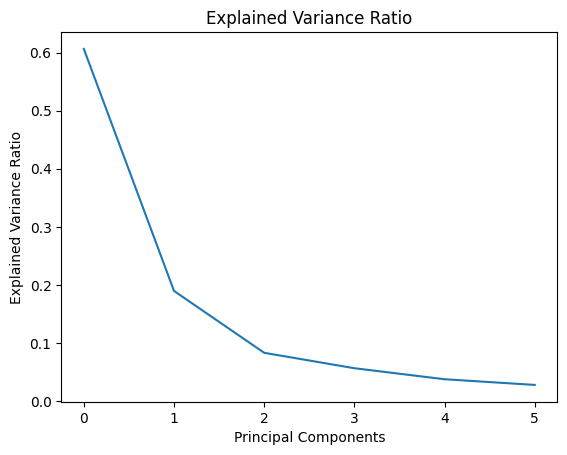

Cumulative Sum of Explained Variance Ratio:  [0.60647936 0.79597156 0.87884674 0.93514354 0.97247364 1.        ]
Components:  [[ 0.40796302  0.26238819  0.43082907  0.47008262  0.4177247   0.4285246 ]
 [-0.49408181  0.71514361 -0.41341087  0.07845818  0.17152239  0.19485538]
 [-0.19042451 -0.51785763 -0.25932022 -0.24292579  0.63660585  0.40501241]
 [-0.00368205 -0.07987585 -0.03592501 -0.08821842 -0.61150859  0.78140287]
 [-0.35520409 -0.38054683 -0.15586935  0.82776143 -0.12852707 -0.05487002]
 [-0.65345569 -0.01869458  0.74205453 -0.14450686  0.0188991   0.02760139]]
[[-0.37825116  1.18504689 -0.37831601 -0.24065525  0.83113145]
 [-0.07252843  1.2248784   0.15561842 -0.70142076  0.76231645]
 [-0.28769288  1.06969711 -0.07777329 -0.41616461  0.8667338 ]
 ...
 [-1.02914612  0.59776364  0.1116245  -0.04885035  0.28048745]
 [-1.01112145  0.60516477  0.1390938  -0.07523671  0.27494155]
 [-1.04266462  0.59221279  0.09102252 -0.02906057  0.28464687]]
Explained Variance Ratio:  [0.60647936 

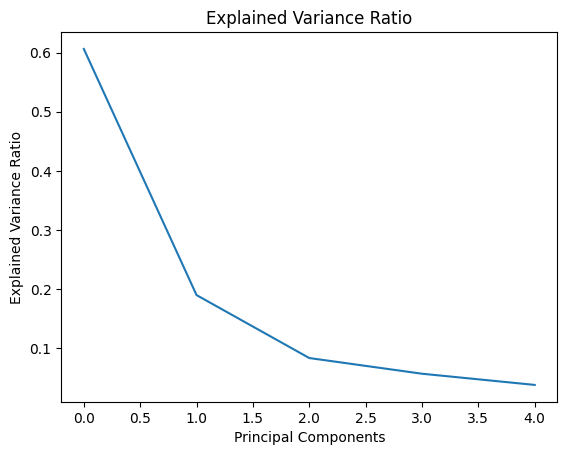

Cumulative Sum of Explained Variance Ratio:  [0.60647936 0.79597156 0.87884674 0.93514354 0.97247364]
Components:  [[ 0.40796302  0.26238819  0.43082907  0.47008262  0.4177247   0.4285246 ]
 [-0.49408181  0.71514361 -0.41341087  0.07845818  0.17152239  0.19485538]
 [-0.19042451 -0.51785763 -0.25932022 -0.24292579  0.63660585  0.40501241]
 [-0.00368205 -0.07987585 -0.03592501 -0.08821842 -0.61150859  0.78140287]
 [-0.35520409 -0.38054683 -0.15586935  0.82776143 -0.12852707 -0.05487002]]
[[-0.37825116  1.18504689 -0.37831601 -0.24065525]
 [-0.07252843  1.2248784   0.15561842 -0.70142076]
 [-0.28769288  1.06969711 -0.07777329 -0.41616461]
 ...
 [-1.02914612  0.59776364  0.1116245  -0.04885035]
 [-1.01112145  0.60516477  0.1390938  -0.07523671]
 [-1.04266462  0.59221279  0.09102252 -0.02906057]]
Explained Variance Ratio:  [0.60647936 0.1894922  0.08287519 0.0562968 ]


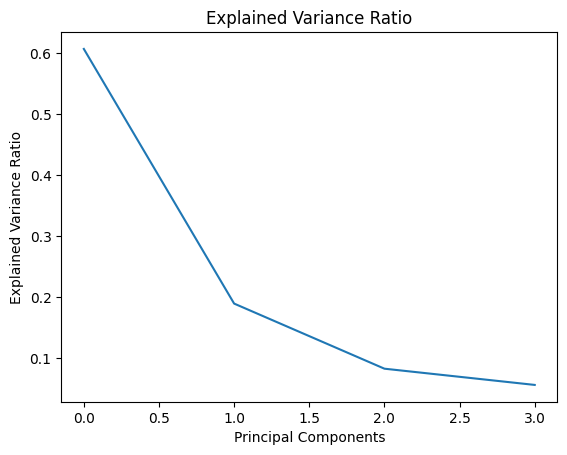

Cumulative Sum of Explained Variance Ratio:  [0.60647936 0.79597156 0.87884674 0.93514354]
Components:  [[ 0.40796302  0.26238819  0.43082907  0.47008262  0.4177247   0.4285246 ]
 [-0.49408181  0.71514361 -0.41341087  0.07845818  0.17152239  0.19485538]
 [-0.19042451 -0.51785763 -0.25932022 -0.24292579  0.63660585  0.40501241]
 [-0.00368205 -0.07987585 -0.03592501 -0.08821842 -0.61150859  0.78140287]]
[[-0.37825116  1.18504689 -0.37831601]
 [-0.07252843  1.2248784   0.15561842]
 [-0.28769288  1.06969711 -0.07777329]
 ...
 [-1.02914612  0.59776364  0.1116245 ]
 [-1.01112145  0.60516477  0.1390938 ]
 [-1.04266462  0.59221279  0.09102252]]
Explained Variance Ratio:  [0.60647936 0.1894922  0.08287519]


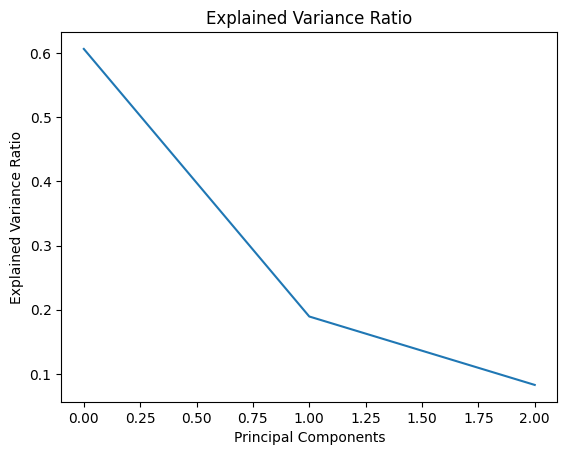

Cumulative Sum of Explained Variance Ratio:  [0.60647936 0.79597156 0.87884674]
Components:  [[ 0.40796302  0.26238819  0.43082907  0.47008262  0.4177247   0.4285246 ]
 [-0.49408181  0.71514361 -0.41341087  0.07845818  0.17152239  0.19485538]
 [-0.19042451 -0.51785763 -0.25932022 -0.24292579  0.63660585  0.40501241]]


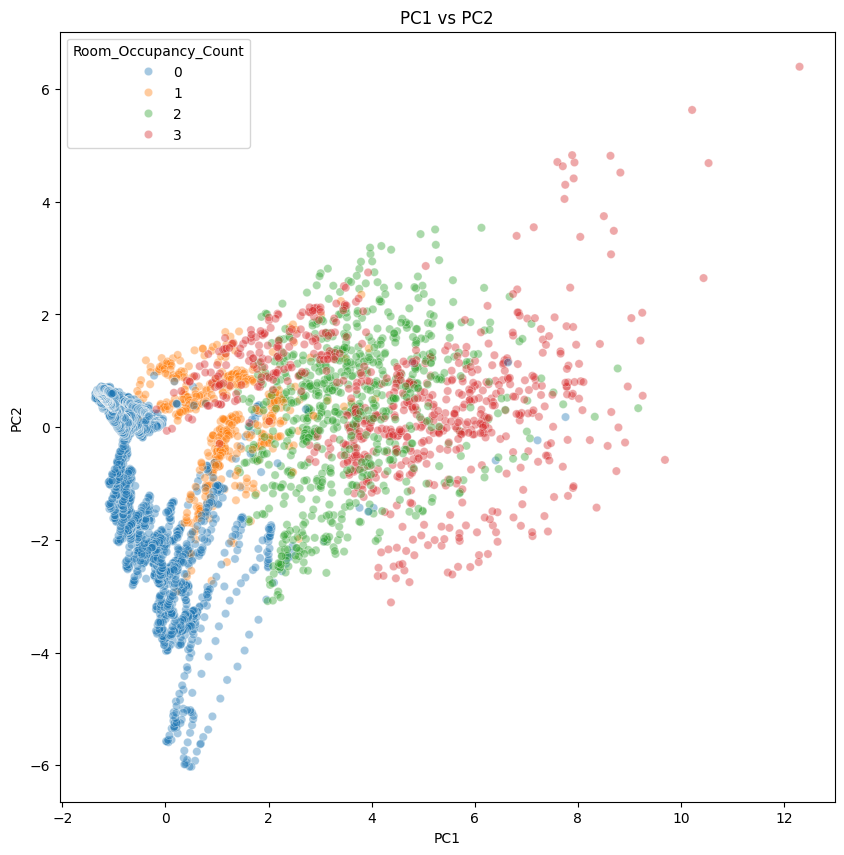

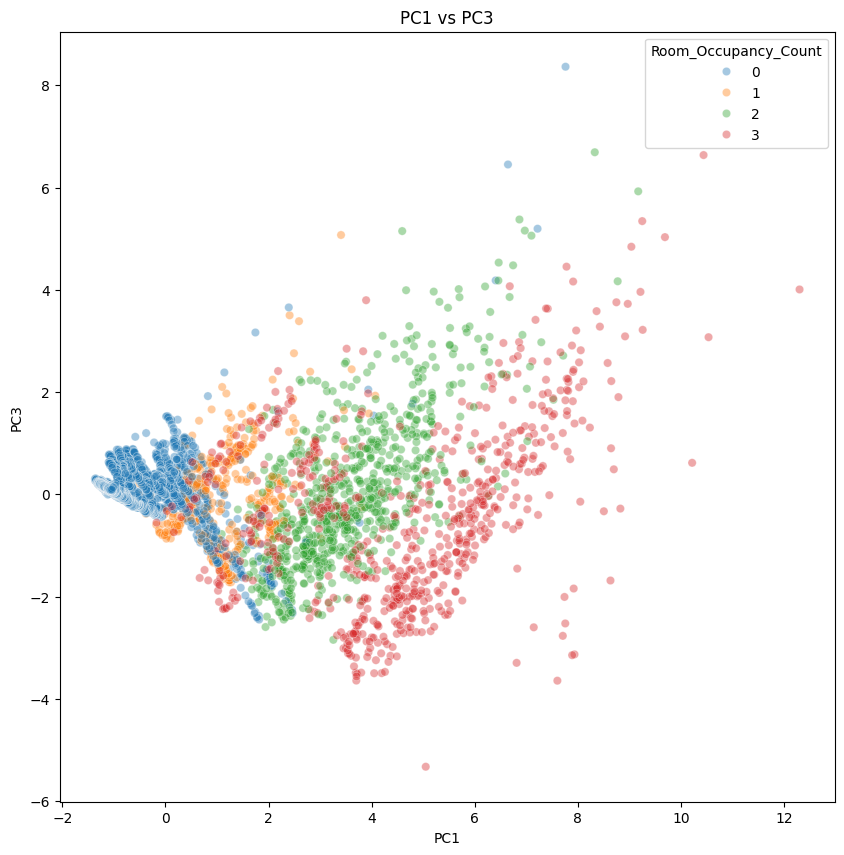

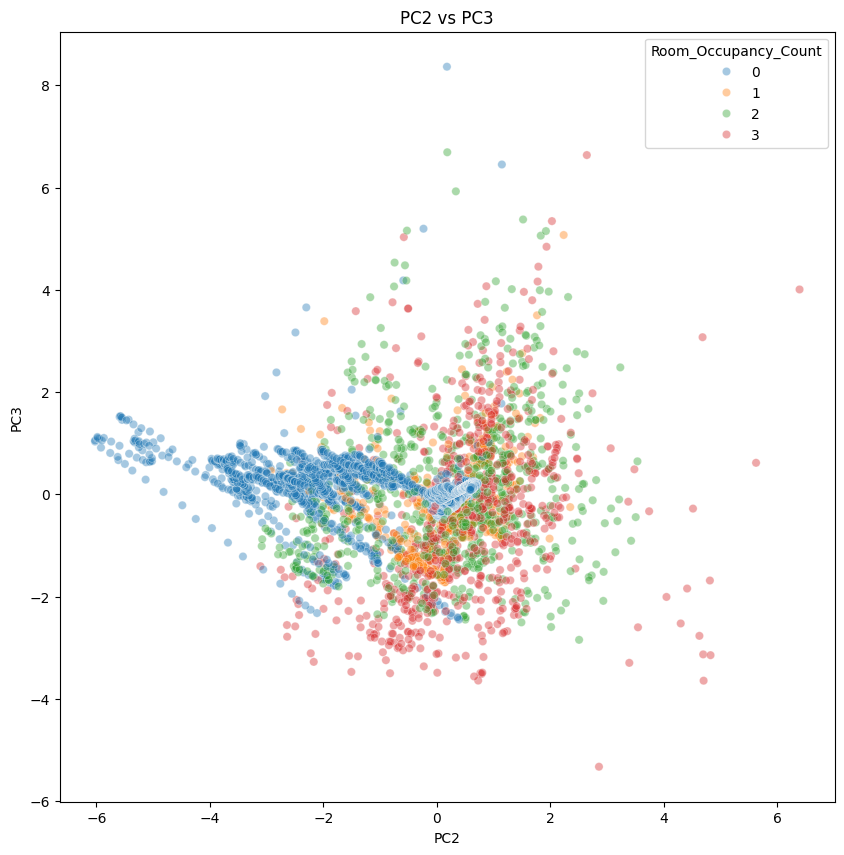

[[-0.37825116  1.18504689]
 [-0.07252843  1.2248784 ]
 [-0.28769288  1.06969711]
 ...
 [-1.02914612  0.59776364]
 [-1.01112145  0.60516477]
 [-1.04266462  0.59221279]]
Explained Variance Ratio:  [0.60647936 0.1894922 ]


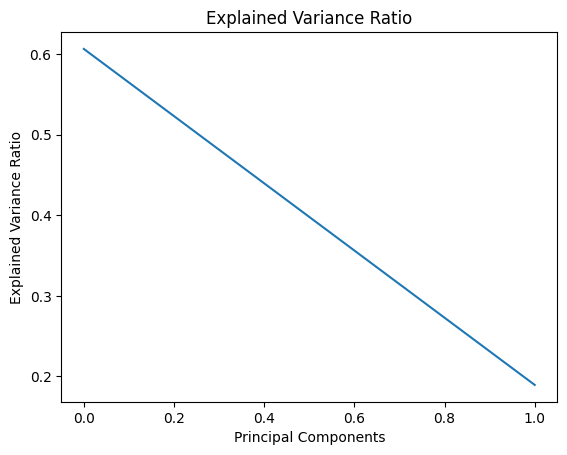

Cumulative Sum of Explained Variance Ratio:  [0.60647936 0.79597156]
Components:  [[ 0.40796302  0.26238819  0.43082907  0.47008262  0.4177247   0.4285246 ]
 [-0.49408181  0.71514361 -0.41341087  0.07845818  0.17152239  0.19485538]]
[[-0.37825116]
 [-0.07252843]
 [-0.28769288]
 ...
 [-1.02914612]
 [-1.01112145]
 [-1.04266462]]
Explained Variance Ratio:  [0.60647936]


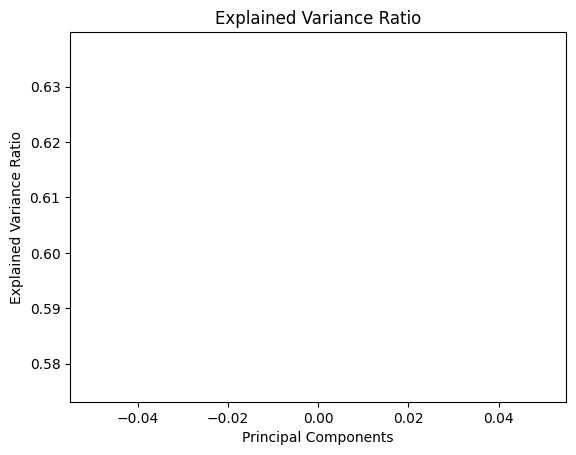

Cumulative Sum of Explained Variance Ratio:  [0.60647936]
Components:  [[0.40796302 0.26238819 0.43082907 0.47008262 0.4177247  0.4285246 ]]


In [32]:
# Scattering the data
pcaComponents = [6, 5, 4, 3, 2, 1]
num_select = 3

for n_components in pcaComponents:
  # Copy data
  data_pca = data.copy()

  scaler = StandardScaler()
  X_pca = data_pca.drop('Room_Occupancy_Count', axis=1)
  X_pca = X_pca.select_dtypes(include=['float64', 'int64'])

  std_df = scaler.fit_transform(X_pca)

  # PCA Definition
  pca = PCA(n_components=n_components)

  # Fitting
  pc = pca.fit_transform(std_df)
  print(pc)

  # Explain the variance ratio between the features
  print('Explained Variance Ratio: ', pca.explained_variance_ratio_)
  plt.plot(pca.explained_variance_ratio_)
  plt.title('Explained Variance Ratio')
  plt.xlabel('Principal Components')
  plt.ylabel('Explained Variance Ratio')
  plt.show()

  # Cumulative sum of the explained variance ratio
  print('Cumulative Sum of Explained Variance Ratio: ', np.cumsum(pca.explained_variance_ratio_))

  # Print Components
  print('Components: ', pca.components_)

  if num_select == n_components:
    # Divide the PC Components
    for i in range(n_components):
      data_pca['PC' + str(i + 1)] = pc[:, i]

    # Scatter Plot PC Components 2 by 2
    for i in range(n_components):
      for j in range(i + 1, n_components):
        plt.figure(figsize=(10, 10))
        sns.scatterplot(data=data_pca, x='PC' + str(i + 1), y='PC' + str(j + 1), hue='Room_Occupancy_Count', alpha=.4)
        plt.title('PC' + str(i + 1) + ' vs PC' + str(j + 1))
        plt.show()